In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load the data
df = pd.read_csv(r'c:\Users\png4\Desktop\AI\Assignments\practical_application_II_starter2\data\vehicles.csv')
df.head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
# Basic data cleaning
def clean_data(df):
    df_clean = df.copy()
    
    # Remove rows with extreme prices (below 1st percentile and above 99th percentile)
    q1 = df_clean['price'].quantile(0.01)
    q3 = df_clean['price'].quantile(0.99)
    df_clean = df_clean[(df_clean['price'] >= q1) & (df_clean['price'] <= q3)]
    
    # Handle missing values
    numeric_cols = ['price', 'year', 'odometer']
    for col in numeric_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Fill categorical missing values with 'unknown'
    categorical_cols = ['manufacturer', 'model', 'condition', 'fuel', 'title_status', 
                       'transmission', 'drive', 'size', 'type', 'paint_color']
    for col in categorical_cols:
        df_clean[col].fillna('unknown', inplace=True)
    
    return df_clean

In [5]:
# Create visualizations
def create_analysis_plots(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Price by top manufacturers
    top_manufacturers = df.groupby('manufacturer')['price'].count().nlargest(10).index
    sns.boxplot(data=df[df['manufacturer'].isin(top_manufacturers)], 
                x='manufacturer', y='price', ax=axes[0,0])
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
    axes[0,0].set_title('Price Distribution by Top Manufacturers')
    
    # Plot 2: Price vs Year
    sns.scatterplot(data=df, x='year', y='price', alpha=0.5, ax=axes[0,1])
    axes[0,1].set_title('Price vs Year')
    
    # Plot 3: Price by Condition
    sns.boxplot(data=df, x='condition', y='price', ax=axes[1,0])
    axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
    axes[1,0].set_title('Price Distribution by Condition')
    
    # Plot 4: Price vs Odometer
    sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5, ax=axes[1,1])
    axes[1,1].set_title('Price vs Odometer')
    
    plt.tight_layout()
    plt.show()

In [7]:
# Prepare data for modeling
def prepare_for_modeling(df):
    features = ['year', 'odometer', 'manufacturer', 'condition', 'fuel', 
               'transmission', 'drive', 'type']
    X = df[features]
    y = df['price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [8]:
# Function to get feature importance
def get_feature_importance(model, feature_names):
    categorical_features_encoded = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_features = numeric_features + list(categorical_features_encoded)
    
    # Get coefficients
    coefficients = model.named_steps['regressor'].coef_
    
    # Create DataFrame of features and their coefficients
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': abs(coefficients)
    })
    
    return feature_importance.sort_values('Importance', ascending=False)

Cleaning data...

Generating visualizations...


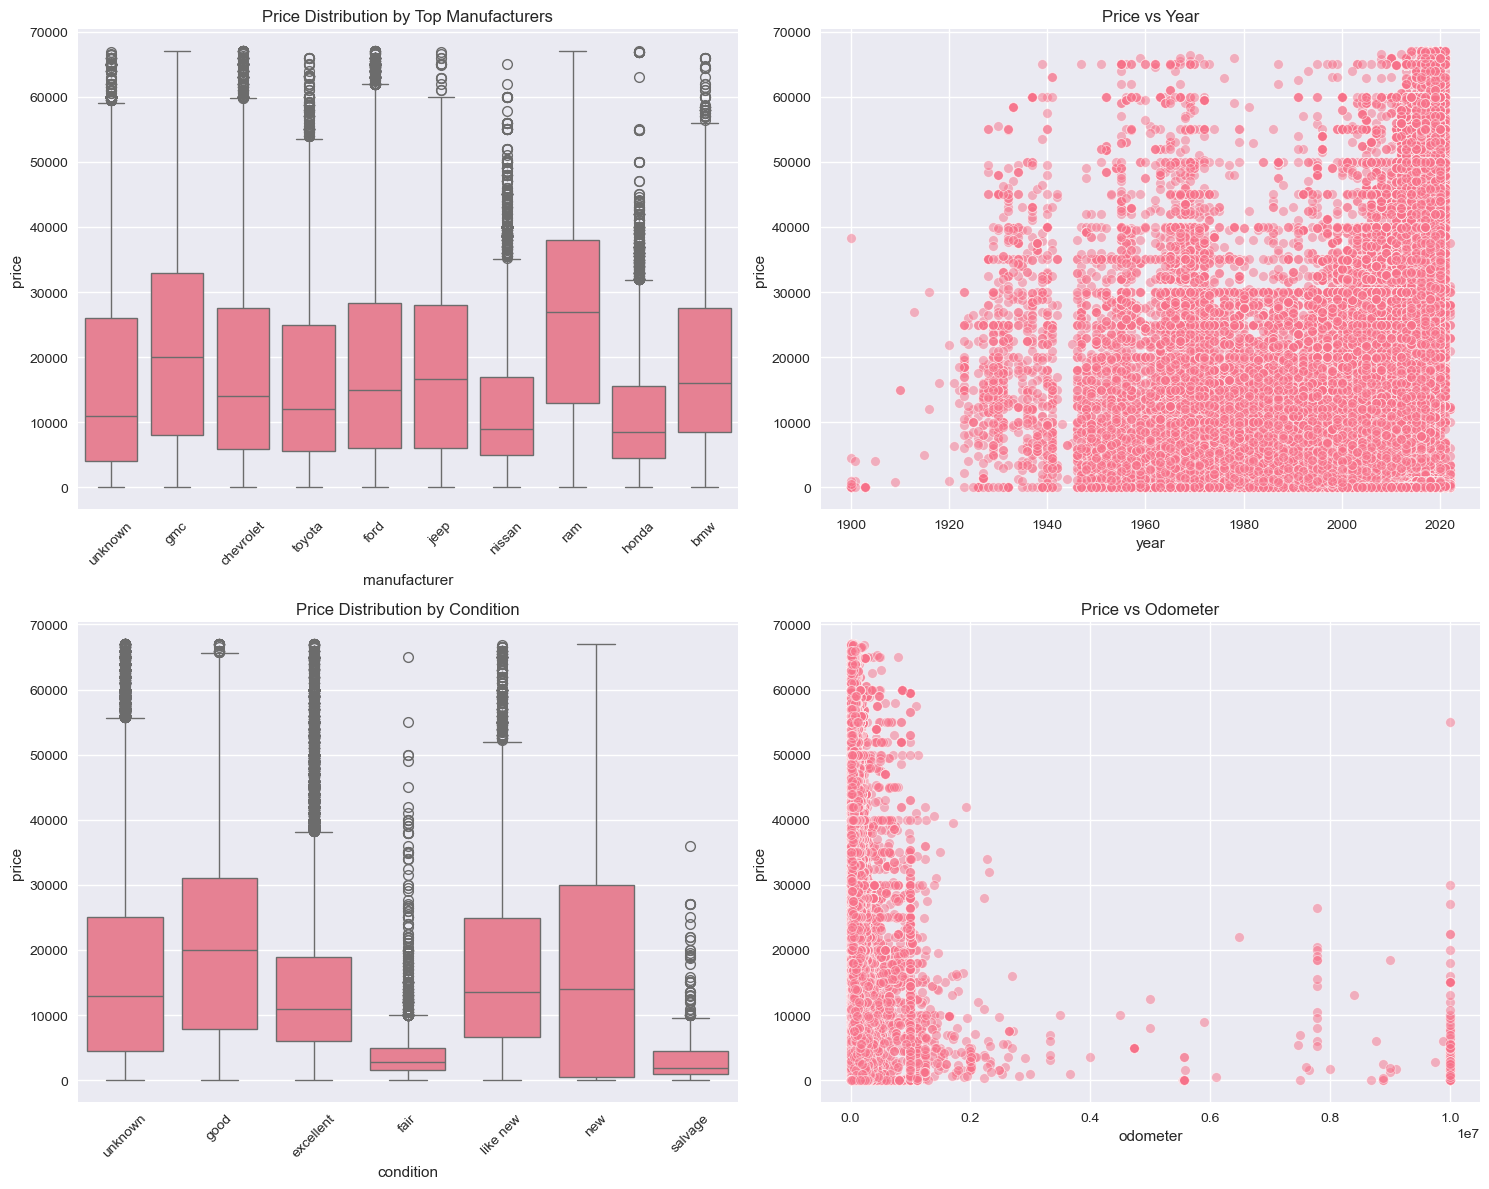


Preparing data for modeling...


In [9]:
# Execution
if __name__ == "__main__":
    # Clean the data
    print("Cleaning data...")
    df_clean = clean_data(df)
    
    # Create and display visualizations
    print("\nGenerating visualizations...")
    create_analysis_plots(df_clean)
    
    # Prepare data for modeling
    print("\nPreparing data for modeling...")
    X_train, X_test, y_train, y_test = prepare_for_modeling(df_clean)
    
    # Define features for preprocessing
    numeric_features = ['year', 'odometer']
    categorical_features = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type']
    
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

In [14]:
# Create models dictionary
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0))
    ]),
    'Lasso': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=1.0))
    ])
}

In [17]:
# Train and evaluate each model
print("\nTraining and evaluating models...")
for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
        print(f"\n{name} Performance:")
        print(f"R-squared Score: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Cross-validation R2 scores: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Training and evaluating models...

Linear Regression Performance:
R-squared Score: 0.333
Mean Squared Error: 127242310.02
Cross-validation R2 scores: 0.335 (+/- 0.005)

Ridge Performance:
R-squared Score: 0.333
Mean Squared Error: 127241005.80
Cross-validation R2 scores: 0.335 (+/- 0.005)

Lasso Performance:
R-squared Score: 0.332
Mean Squared Error: 127298709.85
Cross-validation R2 scores: 0.335 (+/- 0.005)


In [19]:
# Get feature importance for Linear Regression
print("\nAnalyzing feature importance...")
linear_importance = get_feature_importance(models['Linear Regression'], 
                                            numeric_features + categorical_features)
print("\nTop 10 Most Important Features (Linear Regression):")
print(linear_importance.head(10))


Analyzing feature importance...

Top 10 Most Important Features (Linear Regression):
                    Feature    Importance
39       manufacturer_tesla  12450.288709
12     manufacturer_ferrari  11213.905302
56       transmission_other   9022.199399
50            fuel_electric   8302.172122
37      manufacturer_saturn   8279.558110
13        manufacturer_fiat   8218.630665
51                 fuel_gas   7998.663284
52              fuel_hybrid   7879.789021
10      manufacturer_datsun   7854.297861
23  manufacturer_land rover   7853.805173


In [20]:
# Print summary statistics
print("\nDataset Summary:")
print(f"Total number of records: {len(df_clean)}")
print("\nNumerical Features Summary:")
print(df_clean[['price', 'year', 'odometer']].describe())


Dataset Summary:
Total number of records: 422615

Numerical Features Summary:
               price           year      odometer
count  422615.000000  422615.000000  4.226150e+05
mean    16762.499230    2011.212056  9.851964e+04
std     13791.396547       9.379050  2.130260e+05
min         0.000000    1900.000000  0.000000e+00
25%      5899.000000    2008.000000  3.913300e+04
50%     13680.000000    2013.000000  8.643200e+04
75%     25990.000000    2017.000000  1.334170e+05
max     66995.000000    2022.000000  1.000000e+07


In [21]:
# Save the best model
best_model = models['Linear Regression']
print("\nAnalysis complete!")


Analysis complete!
